## Importing Required Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [16]:
try:
    df= pd.read_csv('../data/train.csv')
    print("Dataset loaded successfully")
except FileNotFoundError:
    print("File not found. Please check the file path.")

Dataset loaded successfully


## Data Inspection

In [17]:
# First 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

In [18]:
# Display all columns
print("All columns:")
print(df.columns.tolist())

All columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

In [19]:
# Display summary of DataFrame
print("Dataframe info: ")
print(df.info())

Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

In [20]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_with_count= missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_values_with_count)

Columns with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


## Visualizing The Distribution of `SalePrice`

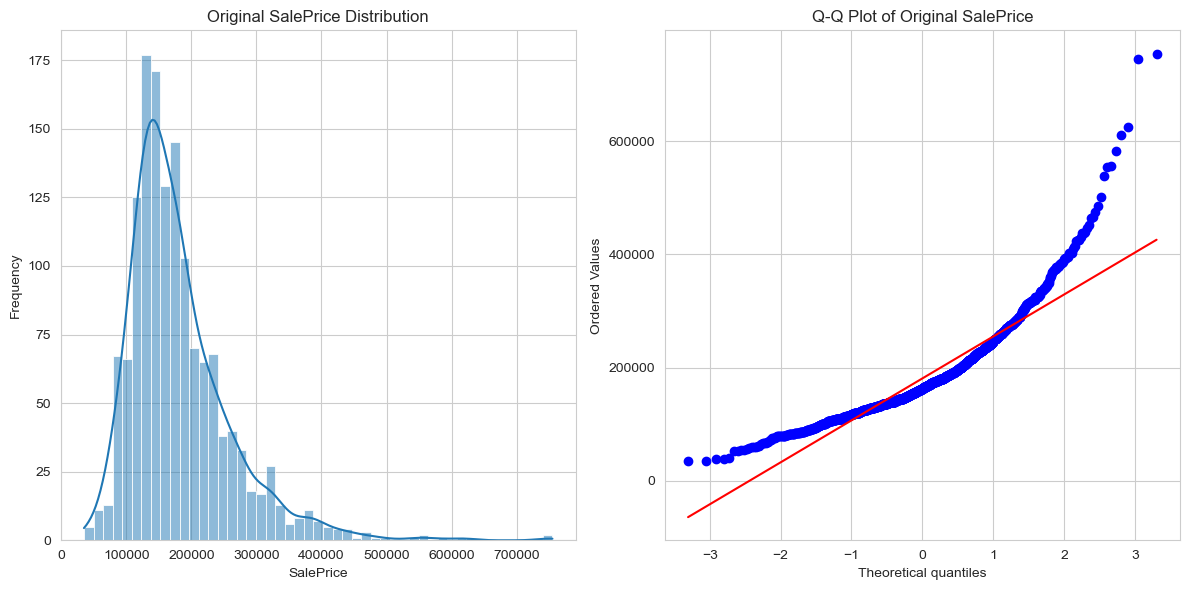

In [21]:
# Plot Distribution and Q-Q Plot
sns.set_style("whitegrid")

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12,6))

sns.histplot(df['SalePrice'], kde= True, ax= ax1)
ax1.set_title('Original SalePrice Distribution')
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('Frequency')

stats.probplot(df['SalePrice'], dist= "norm", plot= ax2)
ax2.set_title('Q-Q Plot of Original SalePrice')

plt.tight_layout()
plt.show()


A Q-Q (Quantile-Quantile) plot is used to determine if a dataset comes from a specific theoretical probability distribution, such as normal distribution.

## Log Transforming `SalePrice`

SalePrice has been log-transformed and saved to 'SalePrice_Log' column.


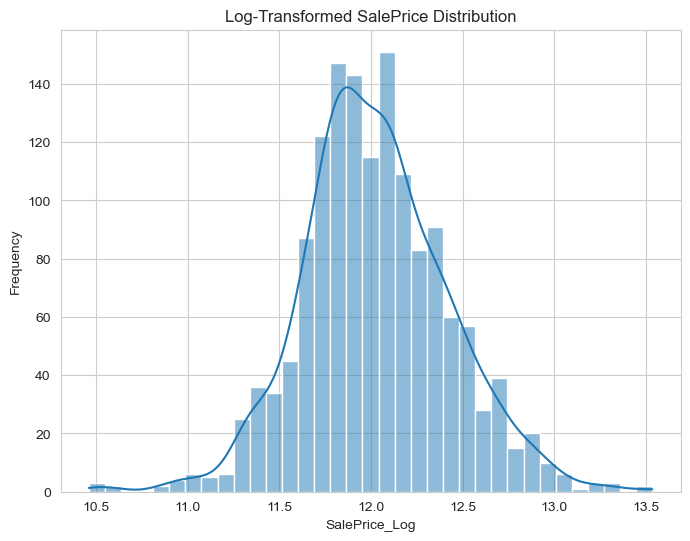

In [22]:
# Apply log-transform to the SalePrice
df['SalePrice_Log']= np.log1p(df['SalePrice'])
print("SalePrice has been log-transformed and saved to 'SalePrice_Log' column.")

# Plot the log-transformed SalePrice distribution
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice_Log'],  kde= True)
plt.title('Log-Transformed SalePrice Distribution')
plt.xlabel('SalePrice_Log')
plt.ylabel('Frequency')
plt.show()

## Save the Log Transformed Target Dataset

In [23]:
# Saving the Processed Raw Data
df.to_csv('../data/raw_train.csv', index= False)
print("Raw data saved to '../data/raw_train.csv'")

Raw data saved to '../data/raw_train.csv'
